In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(1000, 2)

In [5]:
X.shape

(1000, 2)

In [8]:
X

array([[ -1.18224216,  -9.94346785],
       [ -1.46619735, -10.62837519],
       [ -2.59431513,  -8.44841962],
       ...,
       [  1.02513511,   1.0707781 ],
       [ -0.28837459,   1.25040375],
       [  1.03721061,   0.21281382]])

In [7]:
import matplotlib.pyplot as plt

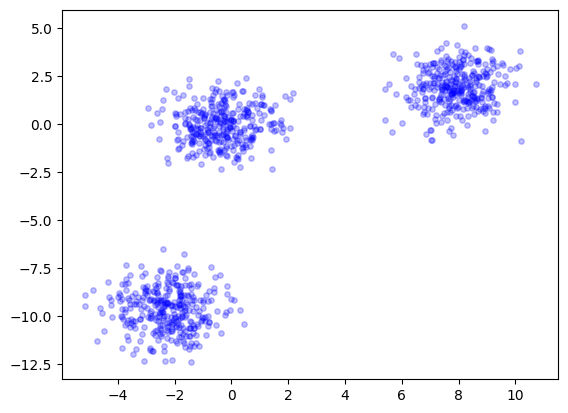

In [11]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=.25, c='b', s=15)

In [14]:
from sklearn.cluster import KMeans

km = KMeans(3, n_init="auto")
# km.fit(X)
y_pred = km.fit_predict(X)

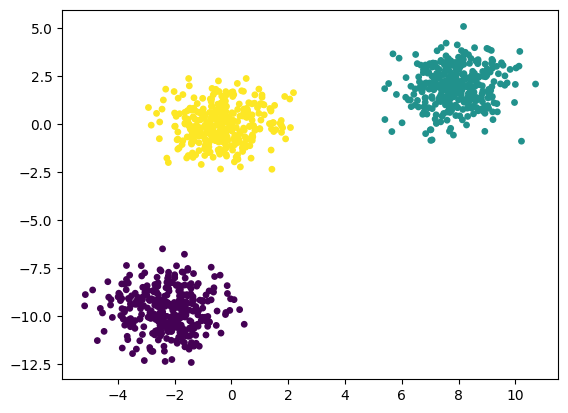

In [16]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=15)

In [17]:
!wget https://raw.githubusercontent.com/reisanar/datasets/master/chameleon.csv

--2024-04-15 10:14:36--  https://raw.githubusercontent.com/reisanar/datasets/master/chameleon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168143 (164K) [text/plain]
Saving to: ‘chameleon.csv’

chameleon.csv       100%[===================>] 164,20K  --.-KB/s    in 0,06s   

2024-04-15 10:14:36 (2,64 MB/s) - ‘chameleon.csv’ saved [168143/168143]



In [18]:
import pandas as pd

df = pd.read_csv("chameleon.csv")

In [20]:
X = df.values

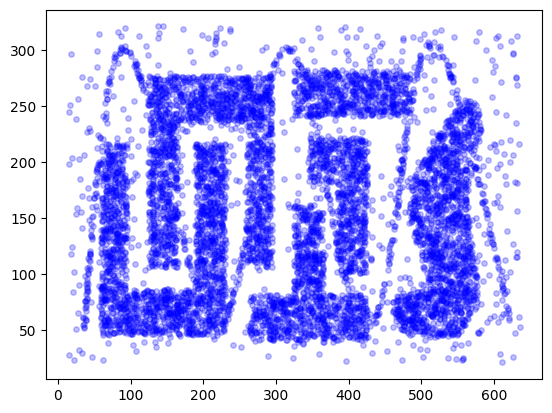

In [22]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=.25, c='b', s=15)

In [32]:
km = KMeans(6, n_init="auto")
y_pred = km.fit_predict(X)

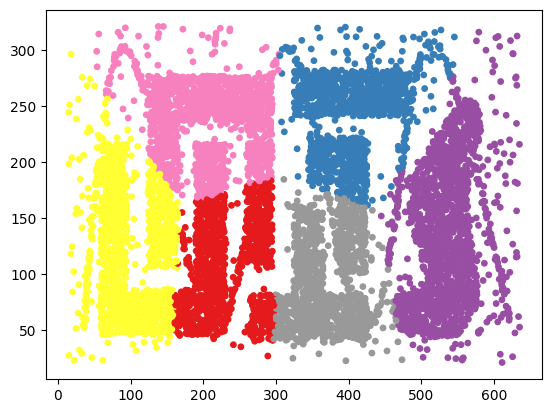

In [33]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=15, cmap="Set1")

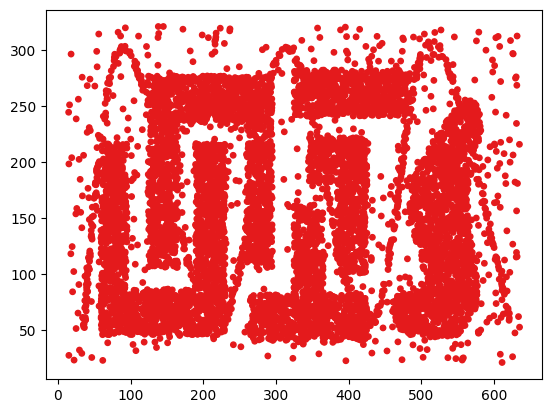

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)
y_pred = dbscan.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=15, cmap="Set1")

In [35]:
X

array([[ 68.601997, 102.491997],
       [454.665985, 264.80899 ],
       [101.283997, 169.285995],
       ...,
       [267.605011, 141.725006],
       [238.358002, 252.729996],
       [159.242004, 177.431   ]])

In [36]:
from sklearn.metrics.pairwise import euclidean_distances

In [39]:
dist = euclidean_distances(X)

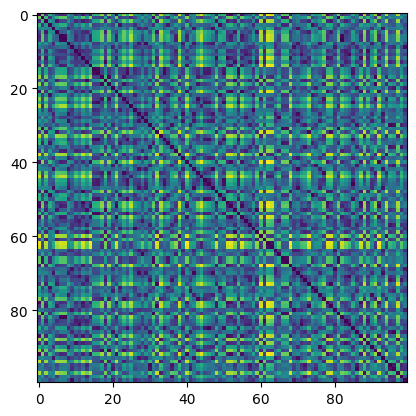

In [44]:
plt.imshow(dist[:100, :100])

In [46]:
import numpy as np

In [48]:
dist_sorted = np.sort(dist, axis=1)

In [49]:
dist_sorted

array([[  0.        ,   1.06554948,   1.20514041, ..., 590.36197582,
        590.92580279, 600.83515576],
       [  0.        ,   1.64987558,   2.26116715, ..., 484.51524665,
        495.29062201, 499.55091008],
       [  0.        ,   7.93500108,   8.50136758, ..., 543.18812697,
        546.22637392, 549.26936938],
       ...,
       [  0.        ,   1.43152845,   1.6924198 , ..., 390.54188166,
        392.07288417, 401.99934505],
       [  0.        ,   1.28827066,   1.66729381, ..., 440.81473944,
        444.11840223, 448.2786188 ],
       [  0.        ,   1.93201113,   2.88879169, ..., 489.95315545,
        491.24382451, 491.75619753]])

In [50]:
dist_sorted.shape

(8000, 8000)

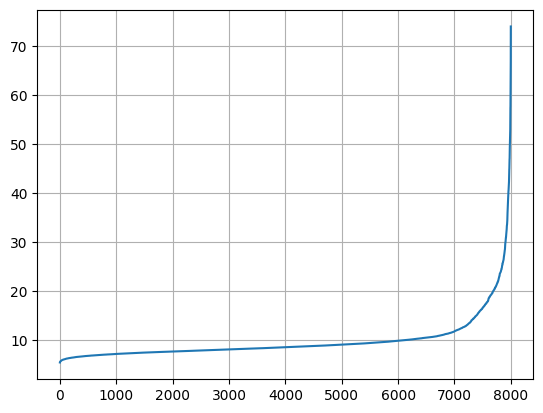

In [64]:
plt.plot(np.sort(dist_sorted[:, 20]))
plt.grid()

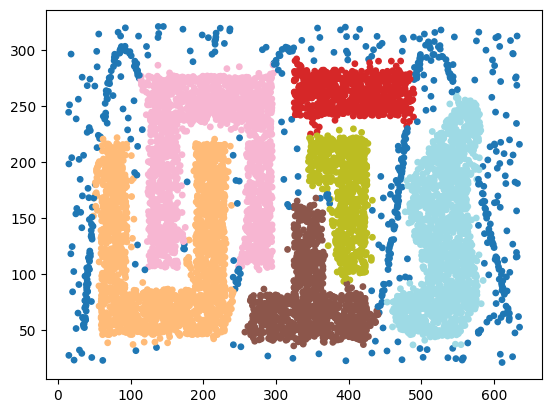

In [66]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=11, min_samples=20)
y_pred = dbscan.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=15, cmap="tab20")

In [74]:
X, y = make_blobs(1000, n_features=2, centers=10)

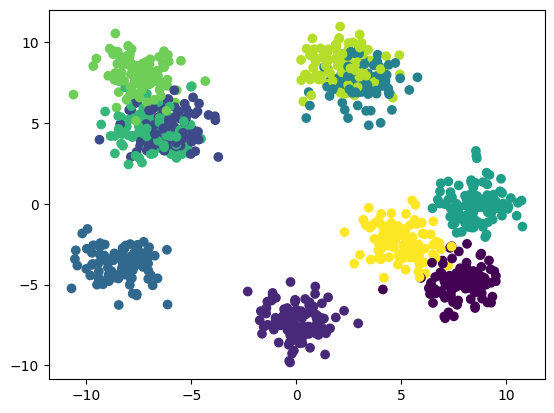

In [75]:
plt.scatter(X[:, 0], X[:,1], c=y)

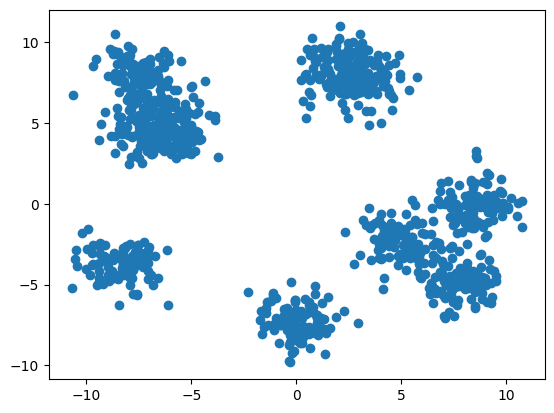

In [117]:
plt.scatter(X[:, 0], X[:,1])

In [78]:
scores = []
for k in range(2, 21):
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(X)
    scores.append(-km.score(X))

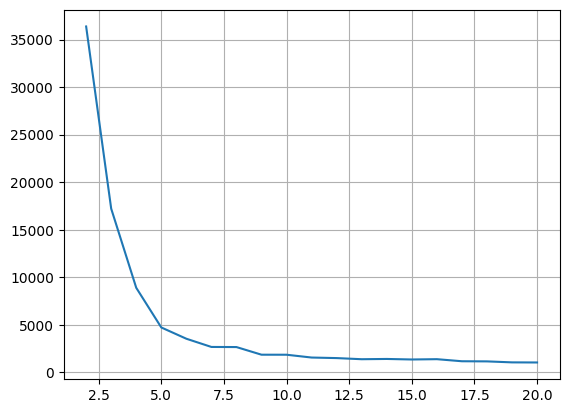

In [112]:
plt.plot(range(2, 21), scores)
plt.grid()

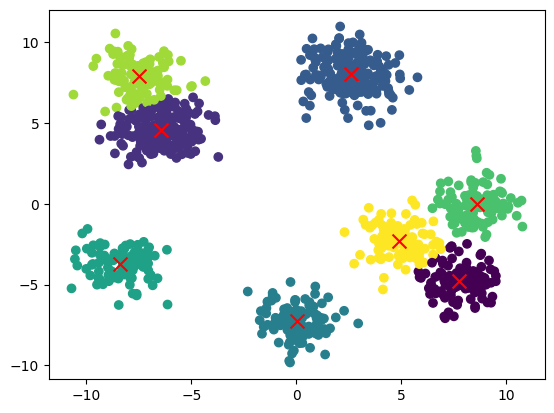

In [125]:
km = KMeans(n_clusters=8, n_init=10)
plt.scatter(X[:,0], X[:,1], c=km.fit_predict(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c='r', s=100)

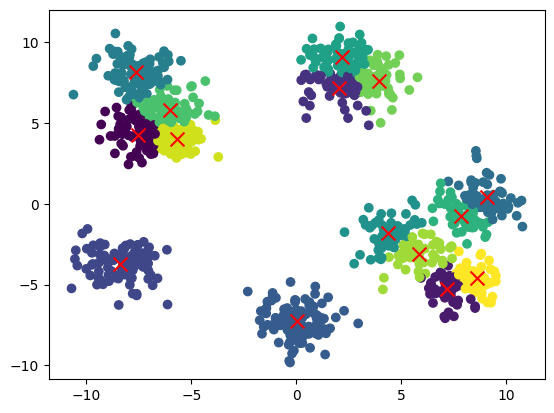

In [121]:
km = KMeans(n_clusters=15, n_init=10)
plt.scatter(X[:,0], X[:,1], c=km.fit_predict(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c='r', s=100)

In [118]:
from sklearn.metrics import silhouette_score

sscores = []
for k in range(2, 21):
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(X)
    sscores.append(silhouette_score(X, km.predict(X)))


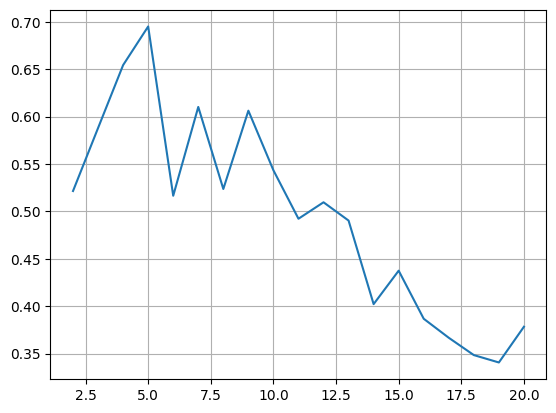

In [120]:
plt.plot(range(2, 21), sscores)
plt.grid()

In [123]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

sscores = []
for k in range(2, 21):
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(X)
    sscores.append(adjusted_rand_score(y, km.predict(X)))


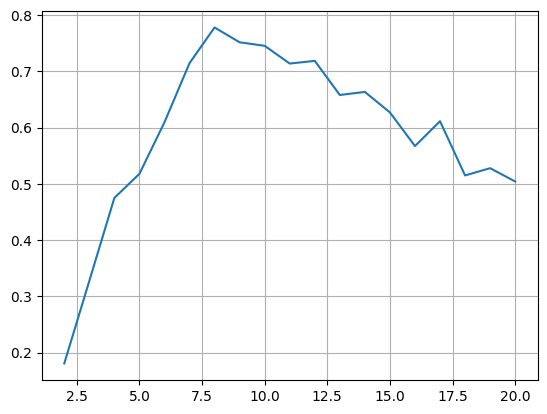

In [124]:
plt.plot(range(2, 21), sscores)
plt.grid()

In [126]:
y

array([8, 2, 0, 1, 4, 0, 0, 7, 7, 4, 4, 6, 9, 0, 8, 7, 2, 7, 2, 1, 8, 5,
       5, 5, 7, 1, 4, 9, 6, 1, 6, 6, 1, 4, 0, 3, 5, 0, 4, 7, 4, 2, 0, 6,
       7, 6, 4, 4, 9, 2, 2, 4, 8, 7, 3, 8, 3, 5, 5, 3, 7, 9, 4, 0, 0, 1,
       2, 3, 2, 7, 7, 1, 6, 1, 1, 8, 9, 8, 0, 3, 0, 4, 0, 1, 2, 5, 3, 3,
       2, 5, 2, 9, 1, 9, 6, 9, 4, 9, 2, 8, 2, 8, 8, 6, 5, 7, 1, 6, 8, 9,
       8, 6, 0, 9, 6, 4, 5, 2, 5, 5, 5, 6, 5, 9, 8, 5, 2, 9, 7, 2, 7, 8,
       7, 9, 2, 8, 4, 2, 5, 9, 3, 6, 0, 5, 0, 8, 5, 3, 5, 4, 2, 5, 8, 3,
       8, 6, 4, 4, 7, 3, 6, 9, 2, 8, 6, 1, 0, 7, 3, 7, 0, 8, 0, 3, 0, 9,
       5, 7, 5, 0, 1, 3, 0, 4, 5, 1, 7, 6, 4, 4, 6, 8, 1, 4, 3, 1, 4, 7,
       8, 8, 6, 4, 9, 6, 8, 7, 0, 9, 4, 4, 1, 1, 6, 9, 9, 0, 3, 4, 6, 7,
       1, 4, 7, 7, 0, 0, 3, 8, 6, 8, 8, 3, 9, 4, 8, 7, 2, 1, 8, 3, 9, 7,
       0, 2, 3, 6, 5, 9, 6, 1, 3, 6, 2, 3, 2, 0, 5, 2, 5, 0, 9, 9, 3, 0,
       7, 6, 2, 1, 3, 0, 4, 7, 8, 3, 7, 7, 8, 9, 4, 3, 6, 2, 6, 9, 5, 4,
       2, 9, 9, 8, 8, 4, 9, 5, 4, 3, 9, 8, 7, 0, 0,